# Problem Statement
### To build a CNN based model which can accurately detect melanoma.
### Melanoma
- It is a type of cancer that can be deadly if not detected early.
- It accounts for 75% of skin caner deaths.
</n>

### A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
- Steps involved are:-
  - 1. Loading Dataset
  - 2. Creating Dataset
  - 3. Visualizing Dataset
  - 4. Creating Model and Visulaizing Train Result
  - 5. Conclusion

#### Step - 1 Loading Dataset

In [1]:
# Importing Library
import pathlib #To determine the path of Dataset
import PIL #Image Processing tool
import os
import numpy as np
import pandas as pd
import glob

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling # Resacling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Input # For Model-1
from tensorflow.keras.layers import Dropout # For Model-2

# Visualizing 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Reading dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Defining path
data_dir_train = pathlib.Path('/content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
# Counting Image 
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# printing
print("Count of Image in Train dataset is : {0}".format(image_count_train))
print("Count of Image in Test dataset is : {0}".format(image_count_test))

Count of Image in Train dataset is : 2239
Count of Image in Test dataset is : 118


### Step - 2 Creating Dataset

In [4]:
# Defining Parameter
batch_size = 32
img_hight = 180
img_width = 180

Using 80% of Image for Training and 20% of Image for Validation

In [5]:
# Creating Training dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_hight,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'categorical'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
# Creating Validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_hight,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# Creating class name
class_name = train_ds.class_names
print(class_name)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Step - 3 Visualizing Dataset

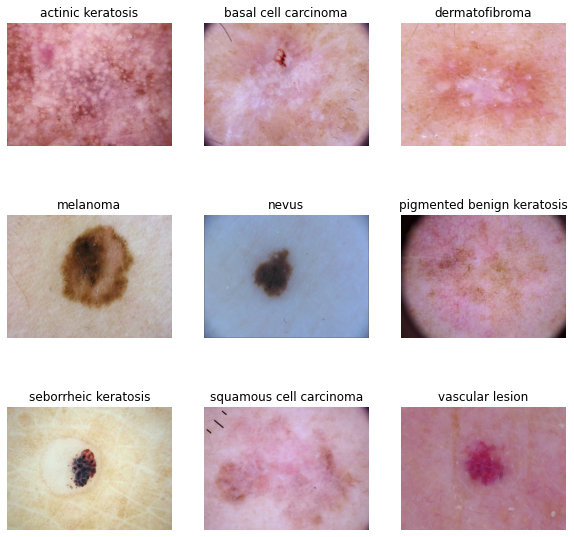

In [8]:
# Plotting Graph
plt.figure(figsize=(10,10))

for i,name in enumerate(class_name):
  path = str(name)+"/"
  img_path = list(data_dir_train.glob(path+"*.jpg"))[0]
  img = Image.open(img_path)
  # Sub plot
  plt.subplot(3,3,i+1, xticks=[], yticks=[])
  plt.imshow(img)
  plt.axis('off')
  plt.title(name)
plt.show()

In [9]:
# Autotuning
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Cleaing cache after each epochs
# Prefetch overlap data processing and model execution while training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Step - 4 Creating Model

In [10]:
# Creating Instance for model-1
model_1 = Sequential()

# Adding rescaling
model_1.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_1.add(Flatten())
# Adding Dense
model_1.add(Dense(32))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Dense
model_1.add(Dense(len(class_name)))
# Adding Activation
model_1.add(Activation('softmax'))

### Step - 5 Compling the Model

In [11]:
# Complie model
model_1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
# Visulaizing Summary of model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0

### Step - 6 Train Model

In [13]:
# Training model
epochs = 20

# history
history = model_1.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 20s 78ms/step - loss: 2.1396 - accuracy: 0.1735 - val_loss: 2.0844 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 2.0591 - accuracy: 0.2054 - val_loss: 2.0272 - val_accuracy: 0.2103
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.9885 - accuracy: 0.2098 - val_loss: 1.9518 - val_accuracy: 0.2349
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.9406 - accuracy: 0.2416 - val_loss: 1.9232 - val_accuracy: 0.2327
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.8584 - accuracy: 0.3069 - val_loss: 1.8115 - val_accuracy: 0.3803
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.6346 - accuracy: 0.4124 - val_loss: 1.5498 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4603 - accuracy: 0.4911 - val_loss: 1.5401 - val_accuracy: 0.4653
Epoch 8/20
5

### Step - 7 Visualizing Training Result

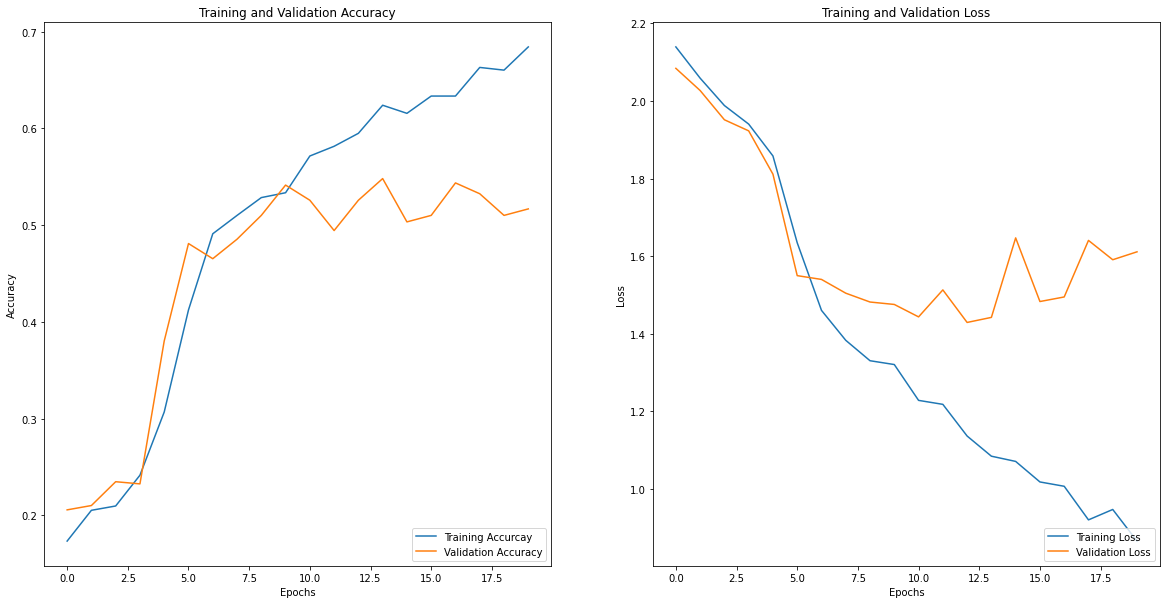

In [14]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

##### Conclusion :
- It seems like model is overfitting after 5 epochs Training Accuracy and Loss is getting diverted from Validation Accuracy and Loss.
- Higher the Epochs, lower the loss that means higher number of the hyperparameter, lower the loss (Overfitting)

#### Adding Data Augmentation

In [15]:
# Data Augmentation
data_augmentation = Sequential([
                                layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2)
])

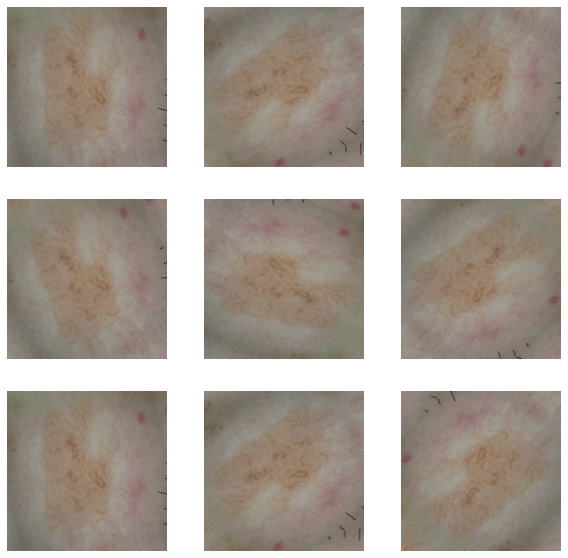

In [16]:
# Visualizing augmentation stratergy
plt.figure(figsize=(10,10))

# Rescaling and Resizing
rescal_and_resize = Sequential(
    [layers.experimental.preprocessing.Rescaling(1.0/255),
     layers.experimental.preprocessing.Resizing(img_hight, img_width)]
)

# Taking image from directory
image, label = next(iter(train_ds))
image = image[10]
# Expanding dimentions
image = tf.expand_dims(image,0)
# Rescaling and Resizing
image = rescal_and_resize(image)
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis('off')

#### Creating Model and Compiling

In [17]:
# Creating model

# Creating Instance for model-2
model_2 = Sequential()

# Adding rescaling
model_2.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3
# Adding Data Augmentance
model_2.add(data_augmentation)
# Adding Convolution layer - 1 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_2.add(Flatten())
# Adding Dense
model_2.add(Dense(32))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Dropout
model_2.add(Dropout(0.25))
# Adding Dense
model_2.add(Dense(len(class_name)))
# Adding Activation
model_2.add(Activation('softmax'))


# Complie model
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# model summary
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 87, 87, 32)       

#### Training Model

In [18]:
# Training model
epochs = 20

# history
history = model_2.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 2.0700 - accuracy: 0.2188 - val_loss: 1.9036 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.8701 - accuracy: 0.3231 - val_loss: 1.8364 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7844 - accuracy: 0.3605 - val_loss: 1.7003 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7525 - accuracy: 0.3549 - val_loss: 1.6290 - val_accuracy: 0.4049
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6595 - accuracy: 0.3940 - val_loss: 1.6140 - val_accuracy: 0.4094
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6995 - accuracy: 0.3767 - val_loss: 1.5488 - val_accuracy: 0.4295
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6288 - accuracy: 0.3996 - val_loss: 1.5880 - val_accuracy: 0.4586
Epoch 8/20
56

#### Visualizing Training Result

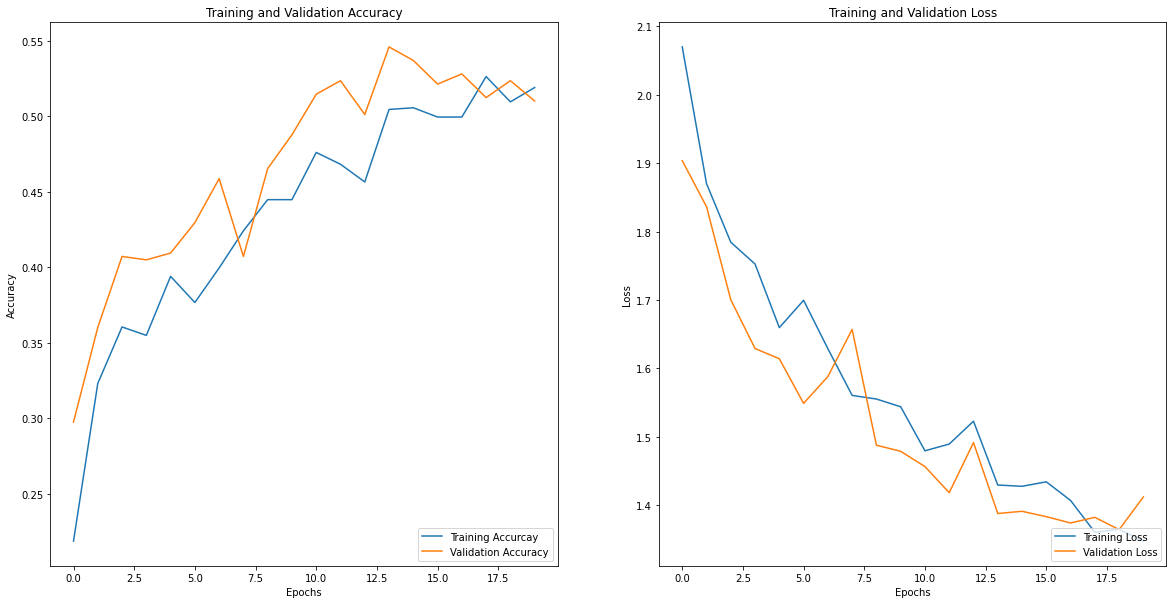

In [19]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

#### Coclusion :
- In Accuracy Curve the Validation and Training performance nearly 55%.
- In Loss Curve the Training Loss Validation Loss is greater than 1.

#### Checking Class Imbalance

In [20]:
# Creating DataFrame
# Path of Image
path_list_1 = [x for x in glob.glob(os.path.join(data_dir_train, "*/*.jpg"))]

# Lesion List
lesion_list_new_1 = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, "*/*.jpg"))]

# Creating Dictionary
dataframe_dict_1 = dict(zip(path_list_1, lesion_list_new_1))

# Creating Dataframe
orignal_df = pd.DataFrame(data= list(dataframe_dict_1.items()), columns= ["Path", "Label"] )

# Checking head()
orignal_df.groupby("Label").count()

,Path
Label,
actinic keratosis,114
basal cell carcinoma,376
dermatofibroma,95
melanoma,438
nevus,357
pigmented benign keratosis,462
seborrheic keratosis,77
squamous cell carcinoma,181
vascular lesion,139


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


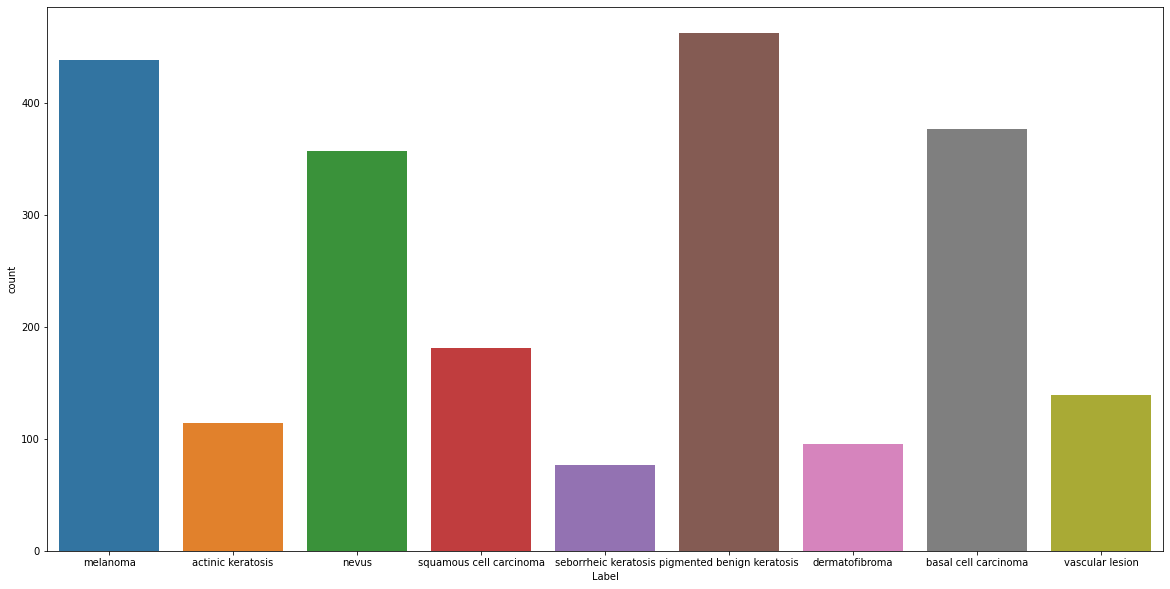

In [21]:
# Plotting graph
plt.figure(figsize=(20,10))
sns.countplot(orignal_df["Label"])
plt.show()

#### Conclusion :
- "Seborrheic Keratosis" having less number of samples.
- "Pigmented benign keratosis" having large number of samples.

#### Adding Augmentor to adding more sample

In [22]:
! pip install Augmentor

#### Steps involved in Augmentor
1. Instantiate a `Pipeline`, Object pointing to a directory containing initial image data set.
2. Defining number of operation to perform on this data using `Pipeline` object.
3. Executing defined operations by calling the `Pipeline's` `Sample()` method.

In [23]:
# Importing Libray
import Augmentor
from sklearn.pipeline import Pipeline

In [24]:
# Path to training data
path_to_training_dataset = "/content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Defining operation for each class name
for each_class in class_name:
  p = Augmentor.Pipeline(path_to_training_dataset + each_class)
  # Applying Operation
  p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
  # Adding 500 Sample
  p.sample(500)

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3CE391D890>: 100%|██████████| 500/500 [00:19<00:00, 26.01 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3CEA032B10>: 100%|██████████| 500/500 [00:18<00:00, 27.40 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3CEA06F6D0>:   0%|          | 2/500 [00:00<01:06,  7.53 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3DD02D39D0>: 100%|██████████| 500/500 [00:19<00:00, 26.01 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1936x1296 at 0x7F3E3006EFD0>: 100%|██████████| 500/500 [01:37<00:00,  5.13 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3CE3930CD0>:   0%|          | 1/500 [00:00<01:24,  5.93 Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F3DD044C7D0>: 100%|██████████| 500/500 [01:21<00:00,  6.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3CEA0D3D90>: 100%|██████████| 500/500 [00:19<00:00, 25.13 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3CE38DAB10>: 100%|██████████| 500/500 [00:43<00:00, 11.60 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D640FD450>: 100%|██████████| 500/500 [00:20<00:00, 24.83 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3CE39062D0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3CEA0D38D0>: 100%|██████████| 500/500 [00:20<00:00, 24.54 Samples/s]


#### Created Augmented Image into "Output" directory

In [25]:
# Count of train image
img_count_train = len(list(data_dir_train.glob("*/output/*.jpg")))
print(img_count_train)

4500


In [26]:
# Path
path_list_2 = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [27]:
# lesion list new
lesion_list_new_2 = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, "*", "output", "*.jpg"))]

In [28]:
# Distribution of Augmented Data after adding new sample

# Creating Dictionary
dataframe_dict_2 = dict(zip(path_list_2, lesion_list_new_2))
 
# Creating Dataframe
df_2 = pd.DataFrame(data= list(dataframe_dict_2.items()), columns= ["Path", "Label"])

# Appending to orignal Dataframe
new_df = orignal_df.append(df_2)

# Value count of each label
new_df["Label"].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

### Training Datat

In [29]:
# Creating instance 
batch_size = 32
img_height = 180
img_width = 180

In [30]:
# Creating Dataset
# Dertermining path
data_dir_train = pathlib.Path('/content/gdrive/My Drive/Skin Cancer Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

# Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode = 'categorical',
    batch_size = batch_size,
    seed = 123,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'training'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [31]:
# Creating Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode = 'categorical',
    batch_size = batch_size,
    seed = 123,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'validation'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Again Creating Model

In [32]:
# Creating model
# Creating Instance for model-1
model_3 = Sequential()

# Adding rescaling
model_3.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_3.add(Flatten())
# Adding Dense
model_3.add(Dense(32))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Dropout
model_3.add(Dropout(0.25))
# Adding Dense
model_3.add(Dense(len(class_name)))
# Adding Activation
model_3.add(Activation('softmax'))

#### Compiling and Training Model

In [33]:
# Compiling Model
model_3.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Summary
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 32)       

In [34]:
# Fitting into model
epochs = 30

# history
history = model_3.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/30
169/169 [==============================] - 35s 197ms/step - loss: 1.9759 - accuracy: 0.2405 - val_loss: 1.6798 - val_accuracy: 0.3534
Epoch 2/30
169/169 [==============================] - 32s 186ms/step - loss: 1.6601 - accuracy: 0.3585 - val_loss: 1.4428 - val_accuracy: 0.4536
Epoch 3/30
169/169 [==============================] - 33s 191ms/step - loss: 1.5004 - accuracy: 0.4343 - val_loss: 1.3696 - val_accuracy: 0.4996
Epoch 4/30
169/169 [==============================] - 32s 183ms/step - loss: 1.4312 - accuracy: 0.4555 - val_loss: 1.3288 - val_accuracy: 0.4937
Epoch 5/30
169/169 [==============================] - 32s 185ms/step - loss: 1.3448 - accuracy: 0.4870 - val_loss: 1.2570 - val_accuracy: 0.5264
Epoch 6/30
169/169 [==============================] - 32s 185ms/step - loss: 1.2615 - accuracy: 0.5158 - val_loss: 1.2308 - val_accuracy: 0.5419
Epoch 7/30
169/169 [==============================] - 33s 187ms/step - loss: 1.2633 - accuracy: 0.5091 - val_loss: 1.2352 - val_ac

#### Visualizing Training Result

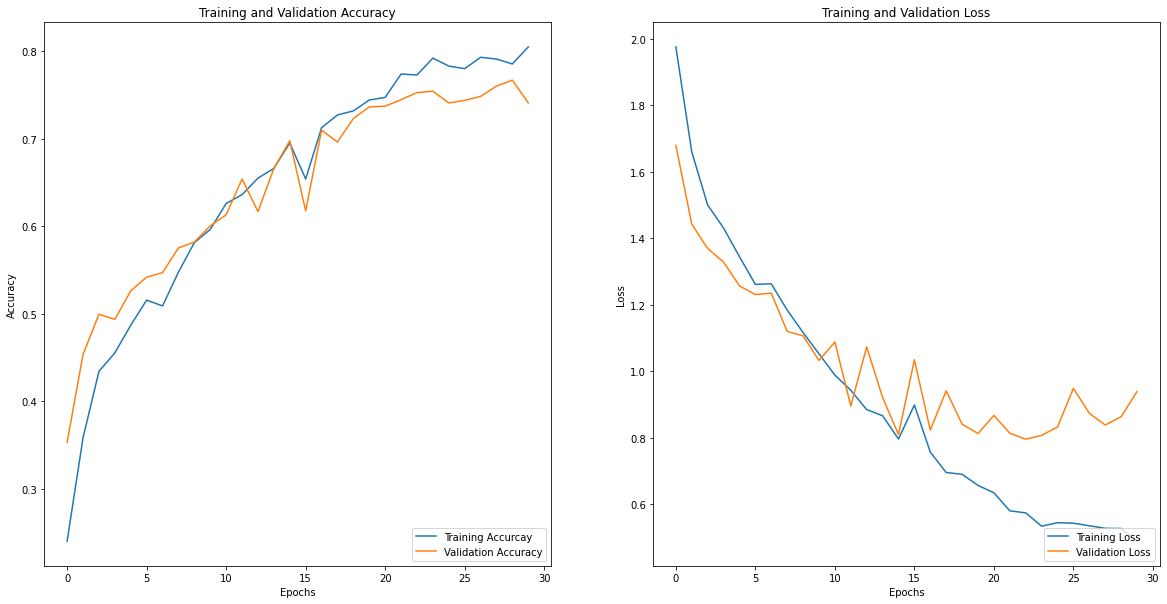

In [35]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

#### Coclusion :
- In Accuracy Curve the Validation and Training performance is greater than 75%.
- In Loss Curve the Training Loss Validation Loss is less than 1.

### Step 5 - Conslusion:
- This model is not overfitted or underfitted as per the Training and Validation Result.